# Finish Data Exploration of Census Data (Rework)

Extract and process census data for further exploration and analysis.

For the type of variable that are being chosen for analysis, see the paper:
https://www.justice.gc.ca/eng/rp-pr/csj-sjc/crime/rr06_6/rr06_6.pdf

Page 15

*   low socio-economic status, high numbers of ethnic/racial minorities and high residential mobility
*   the structural factors of poverty, high heterogeneity, and high mobility created ‘social disorganization’, and it was community-level social disorganization that was presumed to cause crime
*   poverty to produce high rates of violent crime such as family structure and community change

Maybe:
*   high population density, poverty, mixed use of buildings for residential and commercial purposes, transience, dilapidation.

Or：
1. The higher the density, the greater the association between those most and least 
disposed to crime. 
2. The greater the density, the higher the level of moral cynicism. 
3. Where homes are more crowded, there will be a greater tendency to congregate 
outside the home in places where there are opportunities to deviate. 
4. Where homes are crowded, there will be less supervision of children. 
5. A reduced level of supervision results in poor school achievement, with a 
consequent reduction in stakes in conformity. 
6. Poor, dense neighbourhoods tend to be mixed-use neighbourhoods. 
7. Mixed-use offers increased opportunity for congregating outside the home in 
places conducive to deviance. 
8. Poor, dense, mixed-use neighbourhoods have high transience rates.

# Chosen Variables

1.   population density
2.   age group
3.   unemployment
4.   income
5.   gender balance (as part of age group analysis)

# More Detail
Canada Election district has been changed in October 2011, which means the "year" field doesn't mean that the data are from that years, but only extract from which data base. Which means, there are no population percentage change and density data for 2013. And the population percentage change and population density data for 2003 meansure the change from 2006 to 2011.

And data for 2003 only has Household total income in 2010 of private households.

In [3]:
import numpy as np
import pandas as pd

In [12]:
# load data
df_2016 = pd.read_csv('98-401-X2016045_English_CSV_data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
df_2016

,CENSUS_YEAR,GEO_CODE (POR),GEO_LEVEL,GEO_NAME,GNR,GNR_LF,DATA_QUALITY_FLAG,ALT_GEO_CODE,DIM: Profile of Federal Electoral Districts (2013 Representation Order) (2247),Member ID: Profile of Federal Electoral Districts (2013 Representation Order) (2247),Notes: Profile of Federal Electoral Districts (2013 Representation Order) (2247),Dim: Sex (3): Member ID: [1]: Total - Sex,Dim: Sex (3): Member ID: [2]: Male,Dim: Sex (3): Member ID: [3]: Female
0,2016,1,0,Canada,4.0,5.1,20000,1,"Population, 2016",1,1.0,35151728.0,...,...
1,2016,1,0,Canada,4.0,5.1,20000,1,"Population, 2011",2,2.0,33476688.0,...,...
2,2016,1,0,Canada,4.0,5.1,20000,1,"Population percentage change, 2011 to 2016",3,NaN,5.0,...,...
3,2016,1,0,Canada,4.0,5.1,20000,1,Total private dwellings,4,3.0,15412443.0,...,...
4,2016,1,0,Canada,4.0,5.1,20000,1,Private dwellings occupied by usual residents,5,4.0,14072079.0,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790939,2016,62001,2,Nunavut,7.9,8.7,101,62001,Migrants,2243,NaN,4235,2085,2150
790940,2016,62001,2,Nunavut,7.9,8.7,101,62001,Internal migrants,2244,NaN,4045,2005,2045
790941,2016,62001,2,Nunavut,7.9,8.7,101,62001,Intraprovincial migrants,2245,NaN,1510,755,755
790942,2016,62001,2,Nunavut,7.9,8.7,101,62001,Interprovincial migrants,2246,NaN,2535,1245,1285


Census Data schema (2016):

*   "CENSUS_YEAR"
*   "GEO_CODE (POR)"
*   "GEO_LEVEL"
*   "GEO_NAME"
*   "GNR"
*   "GNR_LF"
*   "DATA_QUALITY_FLAG"
*   "ALT_GEO_CODE"
*   "DIM: Profile of Federal Electoral Districts (2013   Representation Order) (2247)"
*   "Member ID: Profile of Federal Electoral Districts (2013 Representation Order) (2247)"
*   "Notes: Profile of Federal Electoral Districts (2013 Representation Order) (2247)"
*   "Dim: Sex (3): Member ID: [1]: Total - Sex"
*   "Dim: Sex (3): Member ID: [2]: Male"
*   "Dim: Sex (3): Member ID: [3]: Female"

Geocode (2016)
*   "59034","Vancouver Centre",757241
*   "59035","Vancouver East",759488
*   "59036","Vancouver Granville",761735
*   "59038","Vancouver Kingsway",766229
*   "59039","Vancouver Quadra",768476
*   "59040","Vancouver South",770723

In [14]:
data = {
    'YEAR': [],
    'GEO_CODE': [],
    'GEO_NAME': [],
    'POPULATION_DENSITY': [],
    'POPULATION_PERCENTAGE_CHANGE': [],
    'POP_TOTAL': [],
    'POP_MALE': [],
    'POP_FEMALE': [],
    'CHILDREN_TOTAL': [],
    'CHILDREN_MALE': [],
    'CHILDREN_FEMALE': [],
    'YOUTH_TOTAL': [],
    'YOUTH_MALE': [],
    'YOUTH_FEMALE': [],
    'ADULT_TOTAL': [],
    'ADULT_MALE': [],
    'ADULT_FEMALE': [],
    'SENIOR_TOTAL': [],
    'SENIOR_MALE': [],
    'SENIOR_FEMALE': [],
    'HOUSEHOLD_INCOME': [],
    'EMPLOYMENT_RATE': [],
    'UNEMPLOYMENT_RATE': []
    }

# Create DataFrame  
df = pd.DataFrame(data)  

In [15]:
df

,YEAR,GEO_CODE,GEO_NAME,POPULATION_DENSITY,POPULATION_PERCENTAGE_CHANGE,POP_TOTAL,POP_MALE,POP_FEMALE,CHILDREN_TOTAL,CHILDREN_MALE,...,YOUTH_FEMALE,ADULT_TOTAL,ADULT_MALE,ADULT_FEMALE,SENIOR_TOTAL,SENIOR_MALE,SENIOR_FEMALE,HOUSEHOLD_INCOME,EMPLOYMENT_RATE,UNEMPLOYMENT_RATE


In [16]:
year = "2016"
Geocodes = [59034, 59035, 59036, 59038, 59039, 59040]

for geocode in Geocodes:
    df_tmpt = df_2016[df_2016['GEO_CODE (POR)'] == geocode]
    geo_name = df_tmpt['GEO_NAME'].iloc[0]

    # Population density per square kilometre
    population_density = float(df_tmpt[df_tmpt["DIM: Profile of Federal Electoral Districts (2013 Representation Order) (2247)"] == "Population density per square kilometre"]["Dim: Sex (3): Member ID: [1]: Total - Sex"])

    # Population percentage change, 2011 to 2016
    population_percentage_change = float(df_tmpt[df_tmpt["DIM: Profile of Federal Electoral Districts (2013 Representation Order) (2247)"] == "Population percentage change, 2011 to 2016"]["Dim: Sex (3): Member ID: [1]: Total - Sex"])

    # age group:
    # Children (00-14 years)
    # Youth (15-24 years)
    # Adults (25-64 years)
    # Seniors (65 years and over)

    total_population = df_tmpt[df_tmpt["DIM: Profile of Federal Electoral Districts (2013 Representation Order) (2247)"] == "Total - Age groups and average age of the population - 100% data"]
    total_population_all = int(total_population['Dim: Sex (3): Member ID: [1]: Total - Sex'])
    total_population_male = int(total_population['Dim: Sex (3): Member ID: [2]: Male'])
    total_population_female = int(total_population['Dim: Sex (3): Member ID: [3]: Female'])

    age_children = df_tmpt[df_tmpt["DIM: Profile of Federal Electoral Districts (2013 Representation Order) (2247)"] == "0 to 14 years"].iloc[0]
    total_num_children = int(age_children['Dim: Sex (3): Member ID: [1]: Total - Sex'])
    male_num_children = int(age_children['Dim: Sex (3): Member ID: [2]: Male'])
    female_num_children = int(age_children['Dim: Sex (3): Member ID: [3]: Female'])

    age_15_64 = df_tmpt[df_tmpt["DIM: Profile of Federal Electoral Districts (2013 Representation Order) (2247)"] == "15 to 64 years"].iloc[0]
    age_15_19 = df_tmpt[df_tmpt["DIM: Profile of Federal Electoral Districts (2013 Representation Order) (2247)"] == "15 to 19 years"].iloc[0]
    age_19_24 = df_tmpt[df_tmpt["DIM: Profile of Federal Electoral Districts (2013 Representation Order) (2247)"] == "20 to 24 years"].iloc[0]

    total_num_youth = int(age_15_19['Dim: Sex (3): Member ID: [1]: Total - Sex']) + int(age_19_24['Dim: Sex (3): Member ID: [1]: Total - Sex'])
    male_num_youth = int(age_15_19['Dim: Sex (3): Member ID: [2]: Male']) + int(age_19_24['Dim: Sex (3): Member ID: [2]: Male'])
    female_num_youth = int(age_15_19['Dim: Sex (3): Member ID: [3]: Female']) + int(age_19_24['Dim: Sex (3): Member ID: [3]: Female'])

    total_num_adult = int(age_15_64['Dim: Sex (3): Member ID: [1]: Total - Sex']) - total_num_youth
    male_num_adult = int(age_15_64['Dim: Sex (3): Member ID: [2]: Male']) - male_num_youth
    female_num_adult = int(age_15_64['Dim: Sex (3): Member ID: [3]: Female']) - female_num_youth

    age_senior = df_tmpt[df_tmpt["DIM: Profile of Federal Electoral Districts (2013 Representation Order) (2247)"] == "65 years and over"].iloc[0]
    total_num_senior = int(age_senior['Dim: Sex (3): Member ID: [1]: Total - Sex'])
    male_num_senior = int(age_senior['Dim: Sex (3): Member ID: [2]: Male'])
    female_num_senior = int(age_senior['Dim: Sex (3): Member ID: [3]: Female'])

    household_income = df_tmpt[df_tmpt["DIM: Profile of Federal Electoral Districts (2013 Representation Order) (2247)"] == "Total - Household total income groups in 2015 for private households - 100% data"]
    household_income_total = float(household_income['Dim: Sex (3): Member ID: [1]: Total - Sex'])

    employment_rate = df_tmpt[df_tmpt["DIM: Profile of Federal Electoral Districts (2013 Representation Order) (2247)"] == "Employment rate"]
    employment_rate_total = float(employment_rate['Dim: Sex (3): Member ID: [1]: Total - Sex'])

    unemployment_rate = df_tmpt[df_tmpt["DIM: Profile of Federal Electoral Districts (2013 Representation Order) (2247)"] == "Unemployment rate"]
    unemployment_rate_total = float(unemployment_rate['Dim: Sex (3): Member ID: [1]: Total - Sex'])

    new_data = {
          'YEAR': year,
          'GEO_CODE': geocode,
          'GEO_NAME': geo_name,
          'POPULATION_DENSITY': population_density,
          'POPULATION_PERCENTAGE_CHANGE': population_percentage_change,
          'POP_TOTAL': total_population_all,
          'POP_MALE': total_population_male,
          'POP_FEMALE': total_population_female,
          'CHILDREN_TOTAL': total_num_children,
          'CHILDREN_MALE': male_num_children,
          'CHILDREN_FEMALE': female_num_children,
          'YOUTH_TOTAL': total_num_youth,
          'YOUTH_MALE': male_num_youth,
          'YOUTH_FEMALE': female_num_youth,
          'ADULT_TOTAL': total_num_adult,
          'ADULT_MALE': male_num_adult,
          'ADULT_FEMALE': female_num_adult,
          'SENIOR_TOTAL': total_num_senior,
          'SENIOR_MALE': male_num_senior,
          'SENIOR_FEMALE': female_num_senior,
          'HOUSEHOLD_INCOME': household_income_total,
          'EMPLOYMENT_RATE': employment_rate_total,
          'UNEMPLOYMENT_RATE': unemployment_rate_total
          }

    df = df.append(new_data, ignore_index=True)

In [17]:
df

,YEAR,GEO_CODE,GEO_NAME,POPULATION_DENSITY,POPULATION_PERCENTAGE_CHANGE,POP_TOTAL,POP_MALE,POP_FEMALE,CHILDREN_TOTAL,CHILDREN_MALE,...,YOUTH_FEMALE,ADULT_TOTAL,ADULT_MALE,ADULT_FEMALE,SENIOR_TOTAL,SENIOR_MALE,SENIOR_FEMALE,HOUSEHOLD_INCOME,EMPLOYMENT_RATE,UNEMPLOYMENT_RATE
0,2016,59034.0,Vancouver Centre,10466.5,13.6,116445.0,59980.0,56460.0,6970.0,3575.0,...,5005.0,84545.0,44410.0,40135.0,15520.0,7595.0,7925.0,70080.0,70.4,5.2
1,2016,59035.0,Vancouver East,5374.7,5.1,115725.0,58375.0,57345.0,12310.0,6345.0,...,5415.0,76585.0,39180.0,37400.0,16230.0,7670.0,8560.0,54245.0,65.8,5.8
2,2016,59036.0,Vancouver Granville,4620.3,3.6,103455.0,48295.0,55165.0,11500.0,6035.0,...,6245.0,63710.0,29620.0,34090.0,16375.0,7005.0,9370.0,48325.0,63.7,5.3
3,2016,59038.0,Vancouver Kingsway,6854.6,2.8,104870.0,50985.0,53885.0,14165.0,7350.0,...,6610.0,61565.0,29705.0,31855.0,15540.0,6940.0,8605.0,38115.0,63.0,5.8
4,2016,59039.0,Vancouver Quadra,2617.6,3.1,105610.0,49780.0,55825.0,14210.0,7315.0,...,8940.0,56465.0,26165.0,30300.0,17415.0,7720.0,9695.0,44740.0,57.2,6.6
5,2016,59040.0,Vancouver South,4973.4,1.9,102925.0,49495.0,53430.0,14015.0,7365.0,...,6965.0,56315.0,26715.0,29605.0,18295.0,8080.0,10210.0,34995.0,59.0,5.8


Census Data schema (2013):

*   "Geo_Code"
*   "Prov_Name"
*   "FED_Name"
*   "Topic"
*   "Characteristic"
*   "Note"
*   "Total"
*   "Flag_Total"
*   "Male"
*   "Flag_Male"
*   "Female"
*   "Flag_Female"


Problem: Between 2006 and 2013, the election district has changed so no population density data and population percentage change data for 2013. Thus use the data of 2016 to represent it

In [18]:
# load 2013 data
df_2013 = pd.read_csv('98-316-XWE2011001-511.csv', encoding= 'unicode_escape')
df_2013_NHS = pd.read_csv('99-004-XWE2011001-511.csv', encoding= 'unicode_escape')

In [19]:
year = "2013"
Geocodes = [59034, 59035, 59036, 59038, 59039, 59040]
Geonames = ["Vancouver Centre", "Vancouver East", "Vancouver Granville", "Vancouver Kingsway", "Vancouver Quadra", "Vancouver South"]
Land_Area = [11.13, 21.53, 22.39, 15.30, 40.34, 20.70]

i = 0
for geocode in Geocodes:
    df_tmpt = df_2013[df_2013['Geo_Code'] == geocode]
    df_tmpt_2016 = df_2016[df_2016['GEO_CODE (POR)'] == geocode]
    df_tmpt_NHS = df_2013_NHS[df_2013_NHS['Geo_Code'] == geocode]
    geoname = Geonames[i]

    #population_density = float(df_tmpt[df_tmpt['Characteristic'] == "Population density per square kilometre"]["Total"])
    #population_percentage_change = float(df_tmpt[df_tmpt["Characteristic"] == "2006 to 2011 population change (%)"]['Total'])

    population_percentage_change = float(df_tmpt_2016[df_tmpt_2016["DIM: Profile of Federal Electoral Districts (2013 Representation Order) (2247)"] == "Population percentage change, 2011 to 2016"]["Dim: Sex (3): Member ID: [1]: Total - Sex"])


    # age group:
    # Children (00-14 years)
    # Youth (15-24 years)
    # Adults (25-64 years)
    # Seniors (65 years and over)

    age_total = df_tmpt[df_tmpt['Characteristic'] == "Total population by age groups"]
    age_total_all = int(age_total['Total'])
    age_total_male = int(age_total['Male'])
    age_total_female = int(age_total['Female'])

    population_density = float(age_total_all) / Land_Area[i]
    i = i + 1

    age_0_4 = df_tmpt[df_tmpt['Characteristic'] == "   0 to 4 years"]
    age_5_9 = df_tmpt[df_tmpt['Characteristic'] == "   5 to 9 years"]
    age_10_14 = df_tmpt[df_tmpt['Characteristic'] == "   10 to 14 years"]
    age_children_total = int(age_0_4['Total']) + int(age_5_9['Total']) + int(age_10_14['Total'])
    age_children_male = int(age_0_4['Male']) + int(age_5_9['Male']) + int(age_10_14['Male'])
    age_children_female = int(age_0_4['Female']) + int(age_5_9['Female']) + int(age_10_14['Female'])

    age_15_19 = df_tmpt[df_tmpt['Characteristic'] == "   15 to 19 years"]
    age_20_24 = df_tmpt[df_tmpt['Characteristic'] == "   20 to 24 years"]
    age_youth_total = int(age_15_19['Total']) + int(age_20_24['Total'])
    age_youth_male = int(age_15_19['Male']) + int(age_20_24['Male'])
    age_youth_female = int(age_15_19['Female']) + int(age_20_24['Female'])

    age_25_29 = df_tmpt[df_tmpt['Characteristic'] == "   25 to 29 years"]
    age_30_34 = df_tmpt[df_tmpt['Characteristic'] == "   30 to 34 years"]
    age_35_39 = df_tmpt[df_tmpt['Characteristic'] == "   35 to 39 years"]
    age_40_44 = df_tmpt[df_tmpt['Characteristic'] == "   40 to 44 years"]
    age_45_49 = df_tmpt[df_tmpt['Characteristic'] == "   45 to 49 years"]
    age_50_54 = df_tmpt[df_tmpt['Characteristic'] == "   50 to 54 years"]
    age_55_59 = df_tmpt[df_tmpt['Characteristic'] == "   55 to 59 years"]
    age_60_64 = df_tmpt[df_tmpt['Characteristic'] == "   60 to 64 years"]
    age_adult_total = int(age_25_29['Total']) + int(age_30_34['Total']) + int(age_35_39['Total']) + \
              int(age_40_44['Total']) + int(age_45_49['Total']) + int(age_50_54['Total']) + \
              int(age_50_54['Total']) + int(age_55_59['Total']) + int(age_60_64['Total'])
    age_adult_male = int(age_25_29['Male']) + int(age_30_34['Male']) + int(age_35_39['Male']) + \
              int(age_40_44['Male']) + int(age_45_49['Male']) + int(age_50_54['Male']) + \
              int(age_50_54['Male']) + int(age_55_59['Male']) + int(age_60_64['Male'])
    age_adult_female = int(age_25_29['Female']) + int(age_30_34['Female']) + int(age_35_39['Female']) + \
              int(age_40_44['Female']) + int(age_45_49['Female']) + int(age_50_54['Female']) + \
              int(age_50_54['Female']) + int(age_55_59['Female']) + int(age_60_64['Female'])

    age_65_69 = df_tmpt[df_tmpt['Characteristic'] == "   65 to 69 years"]
    age_70_74 = df_tmpt[df_tmpt['Characteristic'] == "   70 to 74 years"]
    age_75_79 = df_tmpt[df_tmpt['Characteristic'] == "   75 to 79 years"]
    age_80_84 = df_tmpt[df_tmpt['Characteristic'] == "   80 to 84 years"]
    age_85 = df_tmpt[df_tmpt['Characteristic'] == "   85 years and over"]
    age_senior_total = int(age_65_69['Total']) + int(age_70_74['Total']) + int(age_75_79['Total']) + \
              int(age_80_84['Total']) + int(age_85['Total'])
    age_senior_male = int(age_65_69['Male']) + int(age_70_74['Male']) + int(age_75_79['Male']) + \
              int(age_80_84['Male']) + int(age_85['Male'])
    age_senior_female = int(age_65_69['Female']) + int(age_70_74['Female']) + int(age_75_79['Female']) + \
              int(age_80_84['Female']) + int(age_85['Female'])

    household_income = df_tmpt_NHS[df_tmpt_NHS['Characteristic'] == "Household total income in 2010 of private households"]
    household_income_total = float(household_income['Total'])

    employment_rate = df_tmpt_NHS[df_tmpt_NHS['Characteristic'] == "Employment rate"]
    employment_rate_total = float(employment_rate['Total'])

    unemployment_rate = df_tmpt_NHS[df_tmpt_NHS['Characteristic'] == "Unemployment rate"]
    unemployment_rate_total = float(unemployment_rate['Total'])

    new_data = {
          'YEAR': year,
          'GEO_CODE': geocode,
          'GEO_NAME': geoname,
          'POPULATION_DENSITY': population_density,
          'POPULATION_PERCENTAGE_CHANGE': population_percentage_change,
          'POP_TOTAL': age_total_all,
          'POP_MALE': age_total_male,
          'POP_FEMALE': age_total_female,
          'CHILDREN_TOTAL': age_children_total,
          'CHILDREN_MALE': age_children_male,
          'CHILDREN_FEMALE': age_children_female,
          'YOUTH_TOTAL': age_youth_total,
          'YOUTH_MALE': age_youth_male,
          'YOUTH_FEMALE': age_youth_female,
          'ADULT_TOTAL': age_adult_total,
          'ADULT_MALE': age_adult_male,
          'ADULT_FEMALE': age_adult_female,
          'SENIOR_TOTAL': age_senior_total,
          'SENIOR_MALE': age_senior_male,
          'SENIOR_FEMALE': age_senior_female,
          'HOUSEHOLD_INCOME': household_income_total,
          'EMPLOYMENT_RATE': employment_rate_total,
          'UNEMPLOYMENT_RATE': unemployment_rate_total
          }

    df = df.append(new_data, ignore_index=True)

In [20]:
df

,YEAR,GEO_CODE,GEO_NAME,POPULATION_DENSITY,POPULATION_PERCENTAGE_CHANGE,POP_TOTAL,POP_MALE,POP_FEMALE,CHILDREN_TOTAL,CHILDREN_MALE,...,YOUTH_FEMALE,ADULT_TOTAL,ADULT_MALE,ADULT_FEMALE,SENIOR_TOTAL,SENIOR_MALE,SENIOR_FEMALE,HOUSEHOLD_INCOME,EMPLOYMENT_RATE,UNEMPLOYMENT_RATE
0,2016,59034.0,Vancouver Centre,10466.500000,13.6,116445.0,59980.0,56460.0,6970.0,3575.0,...,5005.0,84545.0,44410.0,40135.0,15520.0,7595.0,7925.0,70080.0,70.4,5.2
1,2016,59035.0,Vancouver East,5374.700000,5.1,115725.0,58375.0,57345.0,12310.0,6345.0,...,5415.0,76585.0,39180.0,37400.0,16230.0,7670.0,8560.0,54245.0,65.8,5.8
2,2016,59036.0,Vancouver Granville,4620.300000,3.6,103455.0,48295.0,55165.0,11500.0,6035.0,...,6245.0,63710.0,29620.0,34090.0,16375.0,7005.0,9370.0,48325.0,63.7,5.3
3,2016,59038.0,Vancouver Kingsway,6854.600000,2.8,104870.0,50985.0,53885.0,14165.0,7350.0,...,6610.0,61565.0,29705.0,31855.0,15540.0,6940.0,8605.0,38115.0,63.0,5.8
4,2016,59039.0,Vancouver Quadra,2617.600000,3.1,105610.0,49780.0,55825.0,14210.0,7315.0,...,8940.0,56465.0,26165.0,30300.0,17415.0,7720.0,9695.0,44740.0,57.2,6.6
5,2016,59040.0,Vancouver South,4973.400000,1.9,102925.0,49495.0,53430.0,14015.0,7365.0,...,6965.0,56315.0,26715.0,29605.0,18295.0,8080.0,10210.0,34995.0,59.0,5.8
6,2013,59034.0,Vancouver Centre,9206.648697,13.6,102470.0,53000.0,49480.0,5795.0,2955.0,...,5675.0,81300.0,42965.0,38330.0,11260.0,5475.0,5785.0,62040.0,69.0,6.2
7,2013,59035.0,Vancouver East,5113.794705,5.1,110100.0,56025.0,54070.0,12205.0,6305.0,...,5755.0,80515.0,41905.0,38620.0,14500.0,6765.0,7735.0,50065.0,63.3,8.6
8,2013,59036.0,Vancouver Granville,4457.570344,3.6,99805.0,46495.0,53310.0,11445.0,5855.0,...,6015.0,70485.0,32505.0,37965.0,13400.0,5685.0,7705.0,46315.0,63.8,5.7
9,2013,59038.0,Vancouver Kingsway,6666.993464,2.8,102005.0,49725.0,52280.0,14810.0,7620.0,...,6510.0,67545.0,32510.0,35020.0,13700.0,6135.0,7560.0,35765.0,60.1,7.3


Census Data schema (2003):

*   "Geo_Code"
*   "Prov_Name"
*   "FED_Name"
*   "Topic"
*   "Characteristic"
*   "Note"
*   "Total"
*   "Flag_Total"
*   "Male"
*   "Flag_Male"
*   "Female"
*   "Flag_Female"

Election District Code (2003):
*   "59029","Vancouver Centre","01000"
*   "59030","Vancouver East","01000"
*   "59032","Vancouver Kingsway","00000"
*   "59033","Vancouver Quadra","00000"
*   "59034","Vancouver South","00000"



In [21]:
# Load 2003 Data
df_2003 = pd.read_csv('98-316-XWE2011001-501.CSV', encoding= 'unicode_escape')
df_2003_NHS = pd.read_csv('99-004-XWE2011001-501.csv', encoding= 'unicode_escape')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [22]:
year = "2003"
Geocodes = [59029, 59030, 59032, 59033, 59034]
Geonames = ["Vancouver Centre", "Vancouver East", "Vancouver Kingsway", "Vancouver Quadra", "Vancouver South"]

i = 0
for geocode in Geocodes:
    df_tmpt = df_2003[df_2003['Geo_Code'] == geocode]
    df_tmpt_NHS = df_2003_NHS[df_2003_NHS['Geo_Code'] == geocode]
    geoname = Geonames[i]
    i = i + 1

    population_density = float(df_tmpt[df_tmpt['Characteristic'] == "Population density per square kilometre"]["Total"])

    population_percentage_change = float(df_tmpt[df_tmpt["Characteristic"] == "2006 to 2011 population change (%)"]['Total'])

    # age group:
    # Children (00-14 years)
    # Youth (15-24 years)
    # Adults (25-64 years)
    # Seniors (65 years and over)

    age_total = df_tmpt[df_tmpt['Characteristic'] == "Total population by age groups"]
    age_total_all = int(age_total['Total'])
    age_total_male = int(age_total['Male'])
    age_total_female = int(age_total['Female'])

    age_0_4 = df_tmpt[df_tmpt['Characteristic'] == "   0 to 4 years"]
    age_5_9 = df_tmpt[df_tmpt['Characteristic'] == "   5 to 9 years"]
    age_10_14 = df_tmpt[df_tmpt['Characteristic'] == "   10 to 14 years"]
    age_children_total = int(age_0_4['Total']) + int(age_5_9['Total']) + int(age_10_14['Total'])
    age_children_male = int(age_0_4['Male']) + int(age_5_9['Male']) + int(age_10_14['Male'])
    age_children_female = int(age_0_4['Female']) + int(age_5_9['Female']) + int(age_10_14['Female'])

    age_15_19 = df_tmpt[df_tmpt['Characteristic'] == "   15 to 19 years"]
    age_20_24 = df_tmpt[df_tmpt['Characteristic'] == "   20 to 24 years"]
    age_youth_total = int(age_15_19['Total']) + int(age_20_24['Total'])
    age_youth_male = int(age_15_19['Male']) + int(age_20_24['Male'])
    age_youth_female = int(age_15_19['Female']) + int(age_20_24['Female'])

    age_25_29 = df_tmpt[df_tmpt['Characteristic'] == "   25 to 29 years"]
    age_30_34 = df_tmpt[df_tmpt['Characteristic'] == "   30 to 34 years"]
    age_35_39 = df_tmpt[df_tmpt['Characteristic'] == "   35 to 39 years"]
    age_40_44 = df_tmpt[df_tmpt['Characteristic'] == "   40 to 44 years"]
    age_45_49 = df_tmpt[df_tmpt['Characteristic'] == "   45 to 49 years"]
    age_50_54 = df_tmpt[df_tmpt['Characteristic'] == "   50 to 54 years"]
    age_55_59 = df_tmpt[df_tmpt['Characteristic'] == "   55 to 59 years"]
    age_60_64 = df_tmpt[df_tmpt['Characteristic'] == "   60 to 64 years"]
    age_adult_total = int(age_25_29['Total']) + int(age_30_34['Total']) + int(age_35_39['Total']) + \
              int(age_40_44['Total']) + int(age_45_49['Total']) + int(age_50_54['Total']) + \
              int(age_50_54['Total']) + int(age_55_59['Total']) + int(age_60_64['Total'])
    age_adult_male = int(age_25_29['Male']) + int(age_30_34['Male']) + int(age_35_39['Male']) + \
              int(age_40_44['Male']) + int(age_45_49['Male']) + int(age_50_54['Male']) + \
              int(age_50_54['Male']) + int(age_55_59['Male']) + int(age_60_64['Male'])
    age_adult_female = int(age_25_29['Female']) + int(age_30_34['Female']) + int(age_35_39['Female']) + \
              int(age_40_44['Female']) + int(age_45_49['Female']) + int(age_50_54['Female']) + \
              int(age_50_54['Female']) + int(age_55_59['Female']) + int(age_60_64['Female'])

    age_65_69 = df_tmpt[df_tmpt['Characteristic'] == "   65 to 69 years"]
    age_70_74 = df_tmpt[df_tmpt['Characteristic'] == "   70 to 74 years"]
    age_75_79 = df_tmpt[df_tmpt['Characteristic'] == "   75 to 79 years"]
    age_80_84 = df_tmpt[df_tmpt['Characteristic'] == "   80 to 84 years"]
    age_85 = df_tmpt[df_tmpt['Characteristic'] == "   85 years and over"]
    age_senior_total = int(age_65_69['Total']) + int(age_70_74['Total']) + int(age_75_79['Total']) + \
              int(age_80_84['Total']) + int(age_85['Total'])
    age_senior_male = int(age_65_69['Male']) + int(age_70_74['Male']) + int(age_75_79['Male']) + \
              int(age_80_84['Male']) + int(age_85['Male'])
    age_senior_female = int(age_65_69['Female']) + int(age_70_74['Female']) + int(age_75_79['Female']) + \
              int(age_80_84['Female']) + int(age_85['Female'])

    household_income = df_tmpt_NHS[df_tmpt_NHS['Characteristic'] == "Household total income in 2010 of private households"]
    household_income_total = float(household_income['Total'])

    employment_rate = df_tmpt_NHS[df_tmpt_NHS['Characteristic'] == "Employment rate"]
    employment_rate_total = float(employment_rate['Total'])

    unemployment_rate = df_tmpt_NHS[df_tmpt_NHS['Characteristic'] == "Unemployment rate"]
    unemployment_rate_total = float(unemployment_rate['Total'])

    new_data = {
          'YEAR': year,
          'GEO_CODE': geocode,
          'GEO_NAME': geoname,
          'POPULATION_DENSITY': population_density,
          'POPULATION_PERCENTAGE_CHANGE': population_percentage_change,
          'POP_TOTAL': age_total_all,
          'POP_MALE': age_total_male,
          'POP_FEMALE': age_total_female,
          'CHILDREN_TOTAL': age_children_total,
          'CHILDREN_MALE': age_children_male,
          'CHILDREN_FEMALE': age_children_female,
          'YOUTH_TOTAL': age_youth_total,
          'YOUTH_MALE': age_youth_male,
          'YOUTH_FEMALE': age_youth_female,
          'ADULT_TOTAL': age_adult_total,
          'ADULT_MALE': age_adult_male,
          'ADULT_FEMALE': age_adult_female,
          'SENIOR_TOTAL': age_senior_total,
          'SENIOR_MALE': age_senior_male,
          'SENIOR_FEMALE': age_senior_female,
          'HOUSEHOLD_INCOME': household_income_total,
          'EMPLOYMENT_RATE': employment_rate_total,
          'UNEMPLOYMENT_RATE': unemployment_rate_total
          }

    df = df.append(new_data, ignore_index=True)

In [23]:
df

,YEAR,GEO_CODE,GEO_NAME,POPULATION_DENSITY,POPULATION_PERCENTAGE_CHANGE,POP_TOTAL,POP_MALE,POP_FEMALE,CHILDREN_TOTAL,CHILDREN_MALE,...,YOUTH_FEMALE,ADULT_TOTAL,ADULT_MALE,ADULT_FEMALE,SENIOR_TOTAL,SENIOR_MALE,SENIOR_FEMALE,HOUSEHOLD_INCOME,EMPLOYMENT_RATE,UNEMPLOYMENT_RATE
0,2016,59034.0,Vancouver Centre,10466.500000,13.6,116445.0,59980.0,56460.0,6970.0,3575.0,...,5005.0,84545.0,44410.0,40135.0,15520.0,7595.0,7925.0,70080.0,70.4,5.2
1,2016,59035.0,Vancouver East,5374.700000,5.1,115725.0,58375.0,57345.0,12310.0,6345.0,...,5415.0,76585.0,39180.0,37400.0,16230.0,7670.0,8560.0,54245.0,65.8,5.8
2,2016,59036.0,Vancouver Granville,4620.300000,3.6,103455.0,48295.0,55165.0,11500.0,6035.0,...,6245.0,63710.0,29620.0,34090.0,16375.0,7005.0,9370.0,48325.0,63.7,5.3
3,2016,59038.0,Vancouver Kingsway,6854.600000,2.8,104870.0,50985.0,53885.0,14165.0,7350.0,...,6610.0,61565.0,29705.0,31855.0,15540.0,6940.0,8605.0,38115.0,63.0,5.8
4,2016,59039.0,Vancouver Quadra,2617.600000,3.1,105610.0,49780.0,55825.0,14210.0,7315.0,...,8940.0,56465.0,26165.0,30300.0,17415.0,7720.0,9695.0,44740.0,57.2,6.6
5,2016,59040.0,Vancouver South,4973.400000,1.9,102925.0,49495.0,53430.0,14015.0,7365.0,...,6965.0,56315.0,26715.0,29605.0,18295.0,8080.0,10210.0,34995.0,59.0,5.8
6,2013,59034.0,Vancouver Centre,9206.648697,13.6,102470.0,53000.0,49480.0,5795.0,2955.0,...,5675.0,81300.0,42965.0,38330.0,11260.0,5475.0,5785.0,62040.0,69.0,6.2
7,2013,59035.0,Vancouver East,5113.794705,5.1,110100.0,56025.0,54070.0,12205.0,6305.0,...,5755.0,80515.0,41905.0,38620.0,14500.0,6765.0,7735.0,50065.0,63.3,8.6
8,2013,59036.0,Vancouver Granville,4457.570344,3.6,99805.0,46495.0,53310.0,11445.0,5855.0,...,6015.0,70485.0,32505.0,37965.0,13400.0,5685.0,7705.0,46315.0,63.8,5.7
9,2013,59038.0,Vancouver Kingsway,6666.993464,2.8,102005.0,49725.0,52280.0,14810.0,7620.0,...,6510.0,67545.0,32510.0,35020.0,13700.0,6135.0,7560.0,35765.0,60.1,7.3


In [24]:
df['YEAR'] = df['YEAR'].astype(int)
df['GEO_NAME'] = df['GEO_NAME'].astype(str)

In [25]:
df.to_csv('census_data.csv')

Acquire the boundary for election districts of Vancouver

https://www.elections.ca/content.aspx?section=res&dir=cir/maps2/bc&document=index&lang=e

# Neighbourhood in Crime Data Set


(maybe not the best approach due to missing neighbourhhod values, try to use x and y axis instead)


Check using


1.   https://maps.gov.bc.ca/ess/hm/bcede/
2.   https://www.elections.ca/content.aspx?section=res&dir=cir/maps2/bc&document=index&lang=e#


*   Oakridge | Vancouver-Langara *
*   Fairview | Vancouver-Fairview *
*   West End | Vancouver-West End *
*   Central Business District | Vancouver-False Creek *
*   Hastings-Sunrise | Vancouver-Hastings *
*   Strathcona | Vancouver-Mount Pleasant *
*   Grandview-Woodland | Vancouver-Hastings *
*   Kitsilano | Vancouver-Point Grey *
*   Kensington-Cedar Cottage | Vancouver-Mount Pleasant *
*   Sunset | Vancouver-Fraserview *
*   Mount Pleasant | Vancouver-Mount Pleasant *
*   Stanley Park | Vancouver-West End *
*   Shaughnessy | Vancouver-Fairview *
*   Marpole | Vancouver-Langara *
*   West Point Grey | Vancouver-Point Grey *
*   Victoria-Fraserview | Vancouver-Kingsway *
*   Kerrisdale | Vancouver-Quilchena *
*   Riley Park | Vancouver-Fairview *
*   Arbutus Ridge | Vancouver-Quilchena *
*   Renfrew-Collingwood | Vancouver-Kingsway *
*   Killarney | Vancouver-Fraserview *
*   Dunbar-Southlands | Vancouver-Quilchena *
*   South Cambie | Vancouver-Fairview *
*   Musqueam | Vancouver-Quilchena *

__________

After 2011
*   Vancouver-Langara | Vancouver Granville
*   Vancouver-Fairview | Vancouver Granville
*   Vancouver-West End | Vancouver Centre
*   Vancouver-False Creek | Vancouver Centre
*   Vancouver-Hastings | Vancouver East
*   Vancouver-Mount Pleasant | Vancouver East
*   Vancouver-Fraserview | Vancouver South
*   Vancouver-Point Grey | Vancouver Quadra
*   Vancouver-Kingsway | Vancouver Kingsway
*   Vancouver-Quilchena | Vancouver Quadra

Before 2011
*   Vancouver-Langara | Vancouver South
*   Vancouver-Fairview | Vancouver Centre
*   Vancouver-West End | Vancouver Centre
*   Vancouver-False Creek | Vancouver Centre
*   Vancouver-Hastings | Vancouver East
*   Vancouver-Mount Pleasant | Vancouver East
*   Vancouver-Fraserview | Vancouver South
*   Vancouver-Point Grey | Vancouver Quadra
*   Vancouver-Kingsway | Vancouver Kingsway
*   Vancouver-Quilchena | Vancouver Quadra

In [32]:
neighbourhood_to_district = {
    'Oakridge': 'Vancouver-Langara',
    'Fairview': 'Vancouver-Fairview',
    'West End': 'Vancouver-West End',
    'Central Business District': 'Vancouver-False Creek',
    'Hastings-Sunrise': 'Vancouver-Hastings',
    'Strathcona': 'Vancouver-Mount Pleasant',
    'Grandview-Woodland': 'Vancouver-Hastings',
    'Kitsilano': 'Vancouver-Point Grey',
    'Kensington-Cedar Cottage': 'Vancouver-Mount Pleasant',
    'Sunset': 'Vancouver-Fraserview',
    'Mount Pleasant': 'Vancouver-Mount Pleasant',
    'Stanley Park': 'Vancouver-West End',
    'Shaughnessy': 'Vancouver-Fairview',
    'Marpole': 'Vancouver-Langara',
    'West Point Grey': 'Vancouver-Point Grey',
    'Victoria-Fraserview': 'Vancouver-Kingsway',
    'Kerrisdale': 'Vancouver-Quilchena',
    'Riley Park': 'Vancouver-Fairview',
    'Arbutus Ridge': 'Vancouver-Quilchena',
    'Renfrew-Collingwood': 'Vancouver-Kingsway',
    'Killarney': 'Vancouver-Fraserview',
    'Dunbar-Southlands': 'Vancouver-Quilchena',
    'South Cambie': 'Vancouver-Fairview',
    'Musqueam': 'Vancouver-Quilchena'
}

district_dict_2011 = {
    "Vancouver-Langara": "Vancouver Granville",
    "Vancouver-Fairview": "Vancouver Granville",
    "Vancouver-West End": "Vancouver Centre",
    "Vancouver-False Creek": "Vancouver Centre",
    "Vancouver-Hastings": "Vancouver East",
    "Vancouver-Mount Pleasant": "Vancouver East",
    "Vancouver-Fraserview": "Vancouver South",
    "Vancouver-Point Grey": "Vancouver Quadra",
    "Vancouver-Kingsway": "Vancouver Kingsway",
    "Vancouver-Quilchena": "Vancouver Quadra"
}

district_dict_2003 = {
    "Vancouver-Langara": "Vancouver South",
    "Vancouver-Fairview": "Vancouver Centre",
    "Vancouver-West End": "Vancouver Centre",
    "Vancouver-False Creek": "Vancouver Centre",
    "Vancouver-Hastings": "Vancouver East",
    "Vancouver-Mount Pleasant": "Vancouver East",
    "Vancouver-Fraserview": "Vancouver South",
    "Vancouver-Point Grey": "Vancouver Quadra",
    "Vancouver-Kingsway": "Vancouver Kingsway",
    "Vancouver-Quilchena": "Vancouver Quadra"
}

In [33]:
def isNaN(num):
    return num != num

# get district of the neighbourhood
def get_district (year, neighbourhood):
    if isNaN(neighbourhood):
        return None
    district1 = neighbourhood_to_district[neighbourhood]
    if year > 2011:
        distirct = district_dict_2011[district1]
        return distirct
    else:
        district = district_dict_2003[district1]
        return district

def reference_year (year):
    if year < 2011:
        return 2003
    else:
        if year < 2016:
            return 2013
        else:
            return 2016

In [42]:
df_crime = pd.read_csv("crime_records.csv")

In [43]:
df_crime.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Break and Enter Commercial,2012,12,14,8,52,NaN,Oakridge,491285.000000,5.453433e+06
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.964805,5.457110e+06
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.779775,5.459174e+06
3,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.943352,5.459166e+06
4,Break and Enter Commercial,2005,11,14,3,9,10XX ALBERNI ST,West End,491021.385727,5.459161e+06


In [44]:
df_crime['GEO_NAME'] = df_crime.apply(lambda row: get_district(row['YEAR'], row['NEIGHBOURHOOD']), axis=1)

In [45]:
df_crime.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,GEO_NAME
0,Break and Enter Commercial,2012,12,14,8,52,NaN,Oakridge,491285.000000,5.453433e+06,Vancouver Granville
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.964805,5.457110e+06,Vancouver Granville
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.779775,5.459174e+06,Vancouver Centre
3,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.943352,5.459166e+06,Vancouver Centre
4,Break and Enter Commercial,2005,11,14,3,9,10XX ALBERNI ST,West End,491021.385727,5.459161e+06,Vancouver Centre


In [46]:
df_crime.to_csv('crime_record_district.csv')

In [47]:
df_crime['YEAR'] = df_crime.apply(lambda row: reference_year(row['YEAR']), axis=1)

In [48]:
df_crime

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,GEO_NAME
0,Break and Enter Commercial,2013,12,14,8,52,NaN,Oakridge,491285.000000,5.453433e+06,Vancouver Granville
1,Break and Enter Commercial,2016,3,7,2,6,10XX SITKA SQ,Fairview,490612.964805,5.457110e+06,Vancouver Granville
2,Break and Enter Commercial,2016,8,27,4,12,10XX ALBERNI ST,West End,491007.779775,5.459174e+06,Vancouver Centre
3,Break and Enter Commercial,2013,8,8,5,13,10XX ALBERNI ST,West End,491015.943352,5.459166e+06,Vancouver Centre
4,Break and Enter Commercial,2003,11,14,3,9,10XX ALBERNI ST,West End,491021.385727,5.459161e+06,Vancouver Centre
...,...,...,...,...,...,...,...,...,...,...,...
624033,Vehicle Collision or Pedestrian Struck (with I...,2013,12,23,13,31,YUKON ST / W BROADWAY AVE,Mount Pleasant,491786.000000,5.456719e+06,Vancouver East
624034,Vehicle Collision or Pedestrian Struck (with I...,2013,3,11,9,20,YUKON ST / W BROADWAY AVE,Mount Pleasant,491786.000000,5.456719e+06,Vancouver East
624035,Vehicle Collision or Pedestrian Struck (with I...,2016,8,4,16,22,YUKON ST / W BROADWAY AVE,Mount Pleasant,491786.000000,5.456719e+06,Vancouver East
624036,Vehicle Collision or Pedestrian Struck (with I...,2003,9,1,20,45,YUKON ST / W KING EDWARD AVE,Riley Park,491786.000000,5.455143e+06,Vancouver Centre


In [49]:
df2 = df_crime.groupby(['GEO_NAME', 'YEAR']).count()['TYPE'].reset_index(name='COUNT')
df2['YEAR'] = df2['YEAR'].astype(int)
df2['GEO_NAME'] = df2['GEO_NAME'].astype(str)

In [50]:
df2

,GEO_NAME,YEAR,COUNT
0,Vancouver Centre,2003,126326
1,Vancouver Centre,2013,47049
2,Vancouver Centre,2016,53700
3,Vancouver East,2003,72498
4,Vancouver East,2013,36158
5,Vancouver East,2016,34820
6,Vancouver Granville,2013,18384
7,Vancouver Granville,2016,19098
8,Vancouver Kingsway,2003,23399
9,Vancouver Kingsway,2013,10601


In [51]:
def crime_per_year(year, count):
    if year == 2003:
        return count / 8 
    elif year == 2016:
        return count / 5
    else:
        return count / 4

In [52]:
df2['AVG_CRIME_COUNT'] = df2.apply(lambda row: crime_per_year(row['YEAR'], row['COUNT']), axis=1)

In [53]:
df2 = df2[['GEO_NAME', 'YEAR', 'AVG_CRIME_COUNT']]

In [54]:
df2

,GEO_NAME,YEAR,AVG_CRIME_COUNT
0,Vancouver Centre,2003,15790.750
1,Vancouver Centre,2013,11762.250
2,Vancouver Centre,2016,10740.000
3,Vancouver East,2003,9062.250
4,Vancouver East,2013,9039.500
5,Vancouver East,2016,6964.000
6,Vancouver Granville,2013,4596.000
7,Vancouver Granville,2016,3819.600
8,Vancouver Kingsway,2003,2924.875
9,Vancouver Kingsway,2013,2650.250


In [55]:
df_result = pd.merge(df, df2, on=['GEO_NAME', 'YEAR'])

In [58]:
df_result.head()

,YEAR,GEO_CODE,GEO_NAME,POPULATION_DENSITY,POPULATION_PERCENTAGE_CHANGE,POP_TOTAL,POP_MALE,POP_FEMALE,CHILDREN_TOTAL,CHILDREN_MALE,...,ADULT_TOTAL,ADULT_MALE,ADULT_FEMALE,SENIOR_TOTAL,SENIOR_MALE,SENIOR_FEMALE,HOUSEHOLD_INCOME,EMPLOYMENT_RATE,UNEMPLOYMENT_RATE,AVG_CRIME_COUNT
0,2016,59034.0,Vancouver Centre,10466.5,13.6,116445.0,59980.0,56460.0,6970.0,3575.0,...,84545.0,44410.0,40135.0,15520.0,7595.0,7925.0,70080.0,70.4,5.2,10740.0
1,2016,59035.0,Vancouver East,5374.7,5.1,115725.0,58375.0,57345.0,12310.0,6345.0,...,76585.0,39180.0,37400.0,16230.0,7670.0,8560.0,54245.0,65.8,5.8,6964.0
2,2016,59036.0,Vancouver Granville,4620.3,3.6,103455.0,48295.0,55165.0,11500.0,6035.0,...,63710.0,29620.0,34090.0,16375.0,7005.0,9370.0,48325.0,63.7,5.3,3819.6
3,2016,59038.0,Vancouver Kingsway,6854.6,2.8,104870.0,50985.0,53885.0,14165.0,7350.0,...,61565.0,29705.0,31855.0,15540.0,6940.0,8605.0,38115.0,63.0,5.8,1881.4
4,2016,59039.0,Vancouver Quadra,2617.6,3.1,105610.0,49780.0,55825.0,14210.0,7315.0,...,56465.0,26165.0,30300.0,17415.0,7720.0,9695.0,44740.0,57.2,6.6,2573.8


In [57]:
df_result.to_csv('census_crime_record.csv')

# Data Exploration

Plot the combined census data and crime data

In [ ]:
Top15['Citable docs per Capita'].corr(Top15['Energy Supply per Capita'])

Correlation: 0.6489478286574839


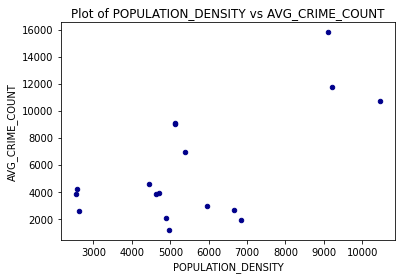

In [90]:
corr_population_density = df_result['POPULATION_DENSITY'].corr(df_result['AVG_CRIME_COUNT'])
print("Correlation: " + str(corr_population_density))

df_result.plot.scatter(
    x='POPULATION_DENSITY', 
    y='AVG_CRIME_COUNT', 
    title='Plot of POPULATION_DENSITY vs AVG_CRIME_COUNT',
    c='DarkBlue'
    )

Correlation: 0.8286895483895318


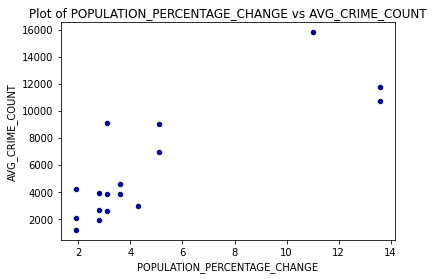

In [91]:
corr_population_percentage_change = df_result['POPULATION_PERCENTAGE_CHANGE'].corr(df_result['AVG_CRIME_COUNT'])
print("Correlation: " + str(corr_population_percentage_change))

df_result.plot.scatter(
    x='POPULATION_PERCENTAGE_CHANGE', 
    y='AVG_CRIME_COUNT', 
    title='Plot of POPULATION_PERCENTAGE_CHANGE vs AVG_CRIME_COUNT',
    c='DarkBlue'
    )

Correlation: 0.48390086397342075


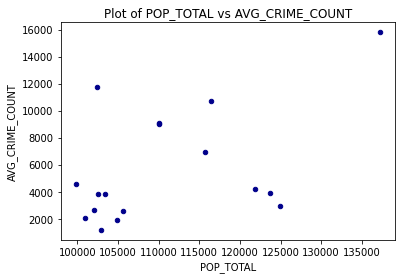

In [93]:
corr_pop_total = df_result['POP_TOTAL'].corr(df_result['AVG_CRIME_COUNT'])
print("Correlation: " + str(corr_pop_total))

df_result.plot.scatter(
    x='POP_TOTAL', 
    y='AVG_CRIME_COUNT', 
    title='Plot of POP_TOTAL vs AVG_CRIME_COUNT',
    c='DarkBlue'
    )

Correlation: 0.6631278609800818


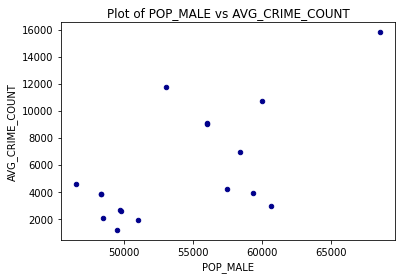

In [94]:
corr_pop_male = df_result['POP_MALE'].corr(df_result['AVG_CRIME_COUNT'])
print("Correlation: " + str(corr_pop_male))

df_result.plot.scatter(
    x='POP_MALE', 
    y='AVG_CRIME_COUNT', 
    title='Plot of POP_MALE vs AVG_CRIME_COUNT',
    c='DarkBlue'
    )

Correlation: 0.22847853212671848


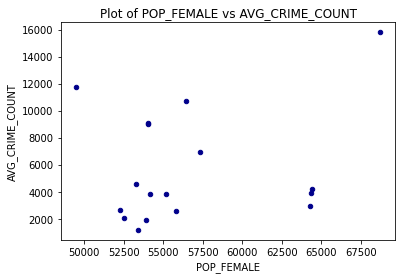

In [95]:
corr_pop_female = df_result['POP_FEMALE'].corr(df_result['AVG_CRIME_COUNT'])
print("Correlation: " + str(corr_pop_female))

df_result.plot.scatter(
    x='POP_FEMALE', 
    y='AVG_CRIME_COUNT', 
    title='Plot of POP_FEMALE vs AVG_CRIME_COUNT',
    c='DarkBlue'
    )

Correlation: -0.7729711997414965


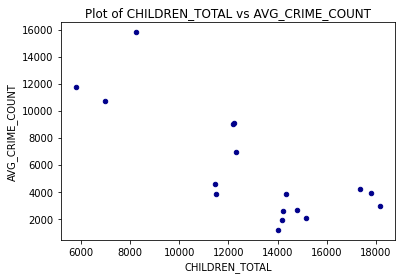

In [96]:
corr_children_total = df_result['CHILDREN_TOTAL'].corr(df_result['AVG_CRIME_COUNT'])
print("Correlation: " + str(corr_children_total))

df_result.plot.scatter(
    x='CHILDREN_TOTAL', 
    y='AVG_CRIME_COUNT', 
    title='Plot of CHILDREN_TOTAL vs AVG_CRIME_COUNT',
    c='DarkBlue'
    )

Correlation: -0.7823866248165784


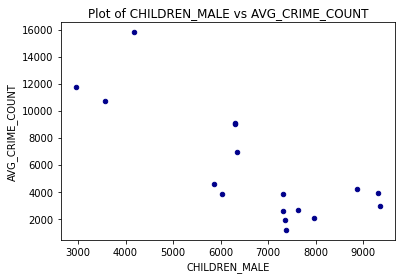

In [97]:
corr_children_male = df_result['CHILDREN_MALE'].corr(df_result['AVG_CRIME_COUNT'])
print("Correlation: " + str(corr_children_male))

df_result.plot.scatter(
    x='CHILDREN_MALE', 
    y='AVG_CRIME_COUNT', 
    title='Plot of CHILDREN_MALE vs AVG_CRIME_COUNT',
    c='DarkBlue'
    )

Correlation: -0.7612272759257463


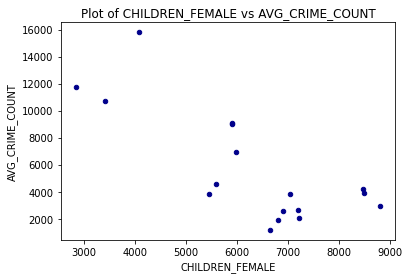

In [98]:
corr_children_female = df_result['CHILDREN_FEMALE'].corr(df_result['AVG_CRIME_COUNT'])
print("Correlation: " + str(corr_children_female))

df_result.plot.scatter(
    x='CHILDREN_FEMALE', 
    y='AVG_CRIME_COUNT', 
    title='Plot of CHILDREN_FEMALE vs AVG_CRIME_COUNT',
    c='DarkBlue'
    )

Correlation: -0.5293941297739326


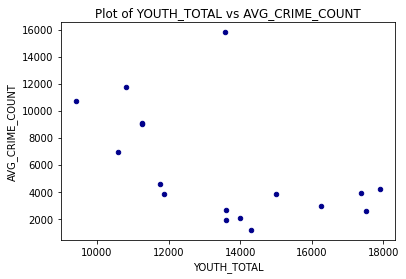

In [99]:
corr_youth_total = df_result['YOUTH_TOTAL'].corr(df_result['AVG_CRIME_COUNT'])
print("Correlation: " + str(corr_youth_total))

df_result.plot.scatter(
    x='YOUTH_TOTAL', 
    y='AVG_CRIME_COUNT', 
    title='Plot of YOUTH_TOTAL vs AVG_CRIME_COUNT',
    c='DarkBlue'
    )

Correlation: -0.6037591498609501


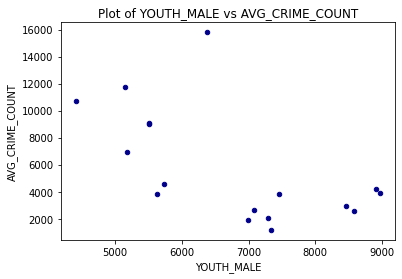

In [100]:
corr_youth_male = df_result['YOUTH_MALE'].corr(df_result['AVG_CRIME_COUNT'])
print("Correlation: " + str(corr_youth_male))

df_result.plot.scatter(
    x='YOUTH_MALE', 
    y='AVG_CRIME_COUNT', 
    title='Plot of YOUTH_MALE vs AVG_CRIME_COUNT',
    c='DarkBlue'
    )

Correlation: -0.42507721457357567


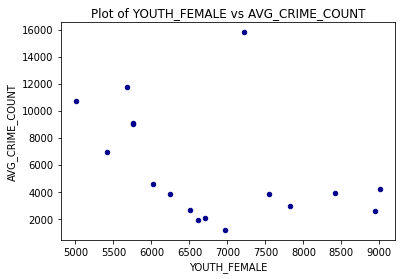

In [101]:
corr_youth_female = df_result['YOUTH_FEMALE'].corr(df_result['AVG_CRIME_COUNT'])
print("Correlation: " + str(corr_youth_female))

df_result.plot.scatter(
    x='YOUTH_FEMALE', 
    y='AVG_CRIME_COUNT', 
    title='Plot of YOUTH_FEMALE vs AVG_CRIME_COUNT',
    c='DarkBlue'
    )

Correlation: 0.8507128386851314


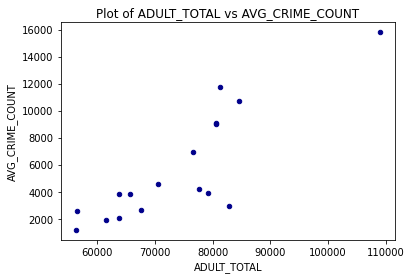

In [102]:
corr_adult_total = df_result['ADULT_TOTAL'].corr(df_result['AVG_CRIME_COUNT'])
print("Correlation: " + str(corr_adult_total))

df_result.plot.scatter(
    x='ADULT_TOTAL', 
    y='AVG_CRIME_COUNT', 
    title='Plot of ADULT_TOTAL vs AVG_CRIME_COUNT',
    c='DarkBlue'
    )

Correlation: 0.9142463345377932


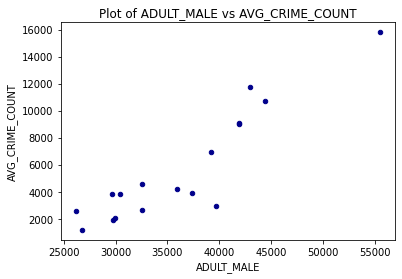

In [103]:
corr_adult_male = df_result['ADULT_MALE'].corr(df_result['AVG_CRIME_COUNT'])
print("Correlation: " + str(corr_adult_male))

df_result.plot.scatter(
    x='ADULT_MALE', 
    y='AVG_CRIME_COUNT', 
    title='Plot of ADULT_MALE vs AVG_CRIME_COUNT',
    c='DarkBlue'
    )

Correlation: 0.7084372273490221


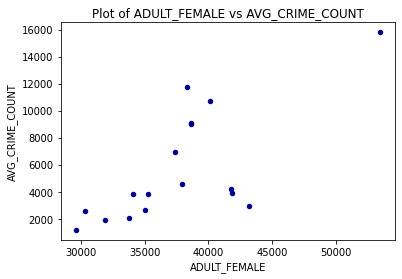

In [104]:
corr_adult_female = df_result['ADULT_FEMALE'].corr(df_result['AVG_CRIME_COUNT'])
print("Correlation: " + str(corr_adult_female))

df_result.plot.scatter(
    x='ADULT_FEMALE', 
    y='AVG_CRIME_COUNT', 
    title='Plot of ADULT_FEMALE vs AVG_CRIME_COUNT',
    c='DarkBlue'
    )

Correlation: -0.45272266417641455


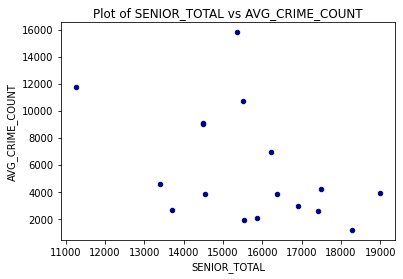

In [105]:
corr_senior_total = df_result['SENIOR_TOTAL'].corr(df_result['AVG_CRIME_COUNT'])
print("Correlation: " + str(corr_senior_total))

df_result.plot.scatter(
    x='SENIOR_TOTAL', 
    y='AVG_CRIME_COUNT', 
    title='Plot of SENIOR_TOTAL vs AVG_CRIME_COUNT',
    c='DarkBlue'
    )

Correlation: -0.23985497166031933


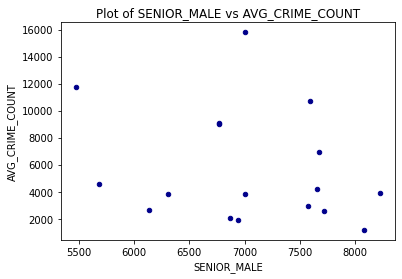

In [106]:
corr_senior_male = df_result['SENIOR_MALE'].corr(df_result['AVG_CRIME_COUNT'])
print("Correlation: " + str(corr_senior_male))

df_result.plot.scatter(
    x='SENIOR_MALE', 
    y='AVG_CRIME_COUNT', 
    title='Plot of SENIOR_MALE vs AVG_CRIME_COUNT',
    c='DarkBlue'
    )

Correlation: -0.5668332282580528


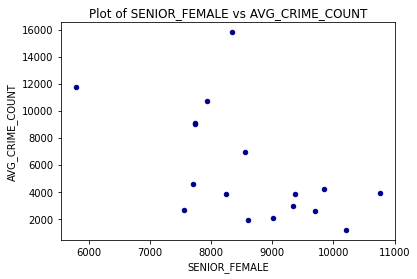

In [107]:
corr_senior_female = df_result['SENIOR_FEMALE'].corr(df_result['AVG_CRIME_COUNT'])
print("Correlation: " + str(corr_senior_female))

df_result.plot.scatter(
    x='SENIOR_FEMALE', 
    y='AVG_CRIME_COUNT', 
    title='Plot of SENIOR_FEMALE vs AVG_CRIME_COUNT',
    c='DarkBlue'
    )

Correlation: 0.9259593326563134


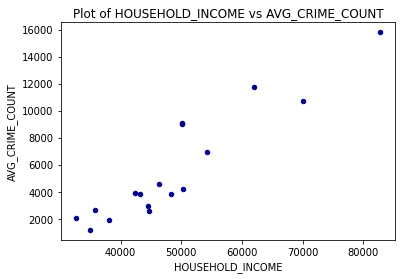

In [108]:
corr_household_income = df_result['HOUSEHOLD_INCOME'].corr(df_result['AVG_CRIME_COUNT'])
print("Correlation: " + str(corr_household_income))

df_result.plot.scatter(
    x='HOUSEHOLD_INCOME', 
    y='AVG_CRIME_COUNT', 
    title='Plot of HOUSEHOLD_INCOME vs AVG_CRIME_COUNT',
    c='DarkBlue'
    )

Correlation: 0.8324795640083875


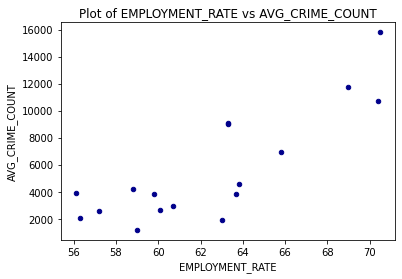

In [109]:
corr_employment_rate = df_result['EMPLOYMENT_RATE'].corr(df_result['AVG_CRIME_COUNT'])
print("Correlation: " + str(corr_employment_rate))

df_result.plot.scatter(
    x='EMPLOYMENT_RATE', 
    y='AVG_CRIME_COUNT', 
    title='Plot of EMPLOYMENT_RATE vs AVG_CRIME_COUNT',
    c='DarkBlue'
    )

Correlation: -0.0694961546505917


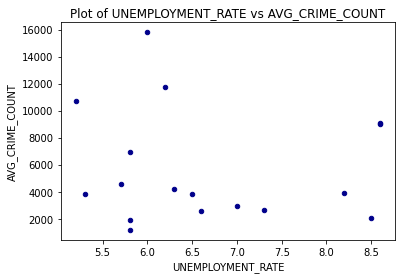

In [110]:
corr_unemployment_rate = df_result['UNEMPLOYMENT_RATE'].corr(df_result['AVG_CRIME_COUNT'])
print("Correlation: " + str(corr_unemployment_rate))

df_result.plot.scatter(
    x='UNEMPLOYMENT_RATE', 
    y='AVG_CRIME_COUNT', 
    title='Plot of UNEMPLOYMENT_RATE vs AVG_CRIME_COUNT',
    c='DarkBlue'
    )

# Feature Selection

Select features: 
*   POPULATION_DENSITY
*   POPULATION_PERCENTAGE_CHANGE
*   POP_MALE
*   CHILDREN_TOTAL
*   YOUTH_MALE
*   ADULT_TOTAL
*   ADULT_MALE
*   ADULT_FEMALE
*   HOUSEHOLD_INCOME
*   EMPLOYMENT_RATE

Note:
CHILDREN_MALE and CHILDREN_FEMALE compose the total number of child population. At the same time, CHILDREN_TOTAL, CHILDREN_MALE and CHILDREN_FEMALE all has similar near indentical correlation with average number of crime happened in the neighbourhood. Thus we will just used the CHILDREN_TOTAL.

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [151]:
y = df_result['AVG_CRIME_COUNT']
X = df_result[['POPULATION_DENSITY', 'POPULATION_PERCENTAGE_CHANGE', 
        'POP_MALE', 'CHILDREN_TOTAL', 'YOUTH_MALE', 
        'ADULT_TOTAL', 'ADULT_MALE', 'ADULT_FEMALE',
        'HOUSEHOLD_INCOME', 'EMPLOYMENT_RATE'
        ]]

# split the train dataset and test dataset by 8:2
X_train_idx, X_test_idx, y_train, y_test = train_test_split(X.index,y,test_size=0.2)
X_train = X.iloc[X_train_idx]
X_test = X.iloc[X_test_idx]

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.983849578902225